In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Mon, 19 Jun 2023   AIC                           2623.589
Time:                        10:48:57   BIC                           2635.533
Sample:                             0   HQIC                          2628.321
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.0

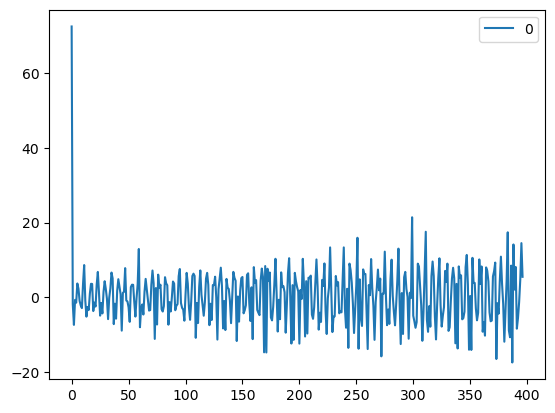

397    133.477101
398    133.775154
399    133.796969
400    133.798565
401    133.798682
402    133.798691
403    133.798691
404    133.798691
405    133.798691
406    133.798691
407    133.798691
408    133.798691
409    133.798691
410    133.798691
411    133.798691
412    133.798691
413    133.798691
414    133.798691
415    133.798691
416    133.798691
417    133.798691
418    133.798691
419    133.798691
420    133.798691
421    133.798691
Name: predicted_mean, dtype: float64


In [2]:
data = pd.read_csv('Electric_Production.csv')
series = data['VALUE']

p,d,q = 1,1,1

model = ARIMA(series, order=(p, d, q))  # Replace p, d, q with appropriate values
model_fit = model.fit()

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Generate forecasts
forecast_steps = 25  # Number of steps to forecast into the future
forecast = model_fit.forecast(steps=forecast_steps)

print(forecast)

In [3]:
data['DATE'] = pd.to_datetime(data['DATE'])
data

,DATE,VALUE
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


               VALUE
DATE                
2000-01-01  102.2301
2000-02-01   94.2989
2000-03-01   88.0927
2000-04-01   81.4425
2000-05-01   84.4552
...              ...
2017-09-01   98.6154
2017-10-01   93.6137
2017-11-01   97.3359
2017-12-01  114.7212
2018-01-01  129.4048

[217 rows x 1 columns]


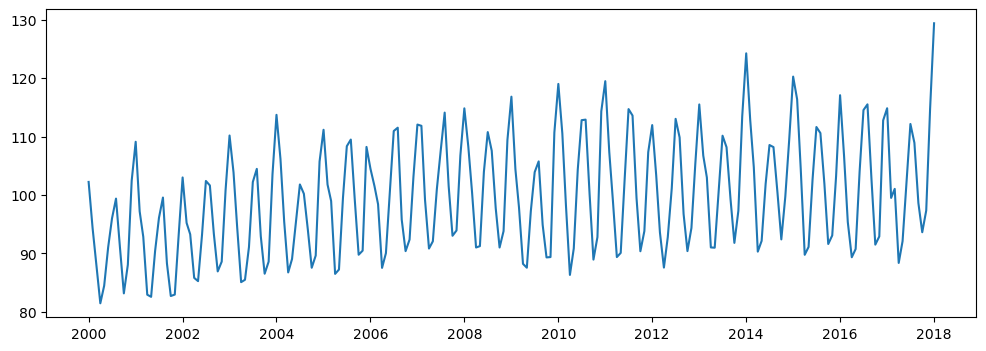

In [4]:
data2 = data.set_index('DATE')
data2 = data2['2000-01-01':]
print(data2)

plt.figure(figsize=(12,4))
plt.plot(data2.VALUE)
plt.show()

C:\Users\91738\AppData\Local\Temp\ipykernel_18680\1026524341.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf, use_line_collection=True)


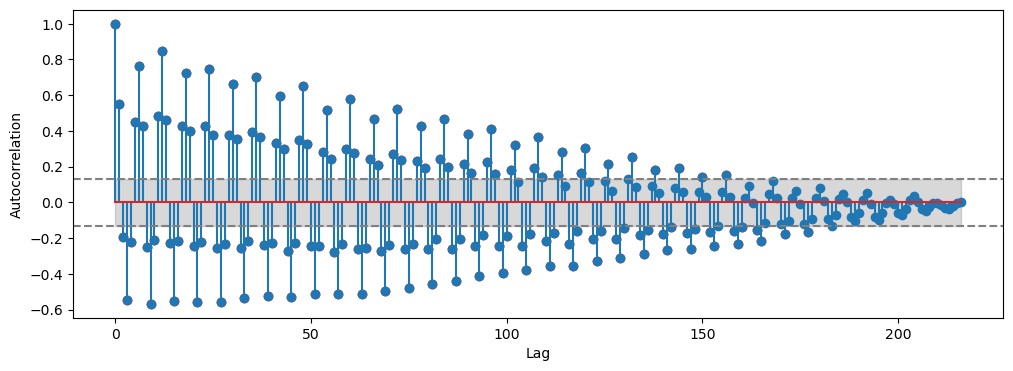

,Lag,ACF
0,0,1.000000
1,1,0.550439
2,2,-0.194912
3,3,-0.546266
4,4,-0.219025
...,...,...
144,160,-0.139154
145,164,-0.155648
146,165,-0.217936
147,171,-0.177322


In [5]:
acf = sm.tsa.acf(data2['VALUE'], nlags=len(data2), fft=True)

confidence_level = 0.95

n = len(data2)
conf_interval = 1.96 / np.sqrt(n)

outside_acf_points = np.where(np.abs(acf) > conf_interval)[0]
outside_acf_values  = acf[outside_acf_points]


plt.figure(figsize=(12,4))

plt.stem(acf, use_line_collection=True)
plt.axhline(y=conf_interval, linestyle='--', color='gray')
plt.axhline(y=-conf_interval, linestyle='--', color='gray')

plt.fill_between(range(len(acf)), conf_interval, -conf_interval, alpha=0.3, color='gray')

plt.scatter(outside_acf_points, outside_acf_values, color='red')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

acf_values_outside = pd.DataFrame()
acf_values_outside["Lag"] = outside_acf_points
acf_values_outside["ACF"] = outside_acf_values

acf_values_outside

C:\Users\91738\anaconda3\envs\tf\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


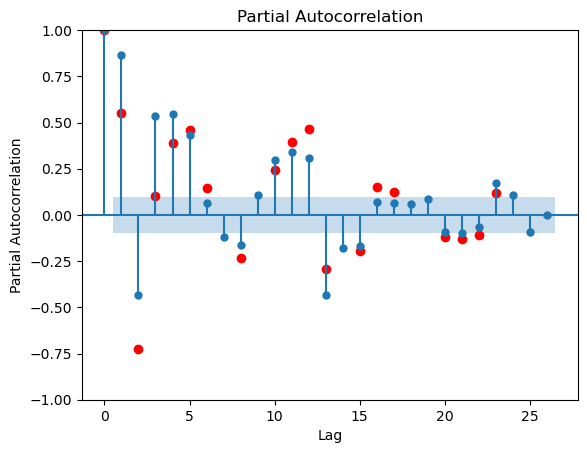

,Lag,PACF
0,0,1.000000
1,1,0.552987
2,2,-0.723878
3,3,0.102606
4,4,0.390453
5,5,0.457420
6,6,0.145343
7,8,-0.234182
8,10,0.243548
9,11,0.393046


In [7]:
pacf = sm.tsa.pacf(data2['VALUE'])

confidence_level = 0.95

n = len(data)
conf_interval = 1.96 / np.sqrt(n)

outside_pacf_points = np.where(np.abs(pacf) > conf_interval)[0]
outside_pacf_values = pacf[outside_pacf_points]

plot_pacf(data['VALUE'], alpha=0.05)

plt.scatter(outside_pacf_points, outside_pacf_values, color='red')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


pacf_values_outside = pd.DataFrame()
pacf_values_outside["Lag"] = outside_pacf_points
pacf_values_outside["PACF"] = outside_pacf_values

pacf_values_outside